This is an Exploratory Data Analysis (EDA) for the dataset

Data columns and attribute information:

               id- unique identifier for each row in the dataset
                   integer
           gender- Gender of the patient for the specific data row
                   "Male", "Female", "Other" 
              age- Age of the patient
                   integer
     hypertension- Whether the patient also has hypertension or not
                   0- no hypertension, 1- hypertension
    heart_disease- Whether the patient also has heart disease or not
                   0- no heart disease, 1- heart disease
     ever_married- Whether the patient has married or not
                   "No", "Yes"
        work_type- Work type of the patient
                   "Private", "Govt_jov", "Never_worked", "children", "Self-employed"
    Residence_type- Residence type of the patient
                   "Rural", "Urban"
    avg_glucose_level- Average glucose level in blood of patient
                   float
              bmi- Body mass index of patient
                   float or "N/A"
    smoking_status- Whether the patient smokes or not
                   "formerly smoked", "never smoked", "smokes", "Unknown"
           stroke- Whether the patient has had a stroke or not
                   0- no stroke , 1- stroke

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plot
import missingno
import seaborn as sns

In [2]:
dataset = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [3]:
print(f"The following code gets the number of rows/entries and number of columns of the dataset. There are 12 columns ie, 12 variables and 5110 data rows/entries.\n")
print(dataset.shape)

print(f"\nData head shows top 5 example rows of the dataset")

dataset.head()

The following code gets the number of rows/entries and number of columns of the dataset. There are 12 columns ie, 12 variables and 5110 data rows/entries.

(5110, 12)

Data head shows top 5 example rows of the dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print(f"Data types for each column:\n")
dataset.info()

Data types for each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB



Preview of data with null values:


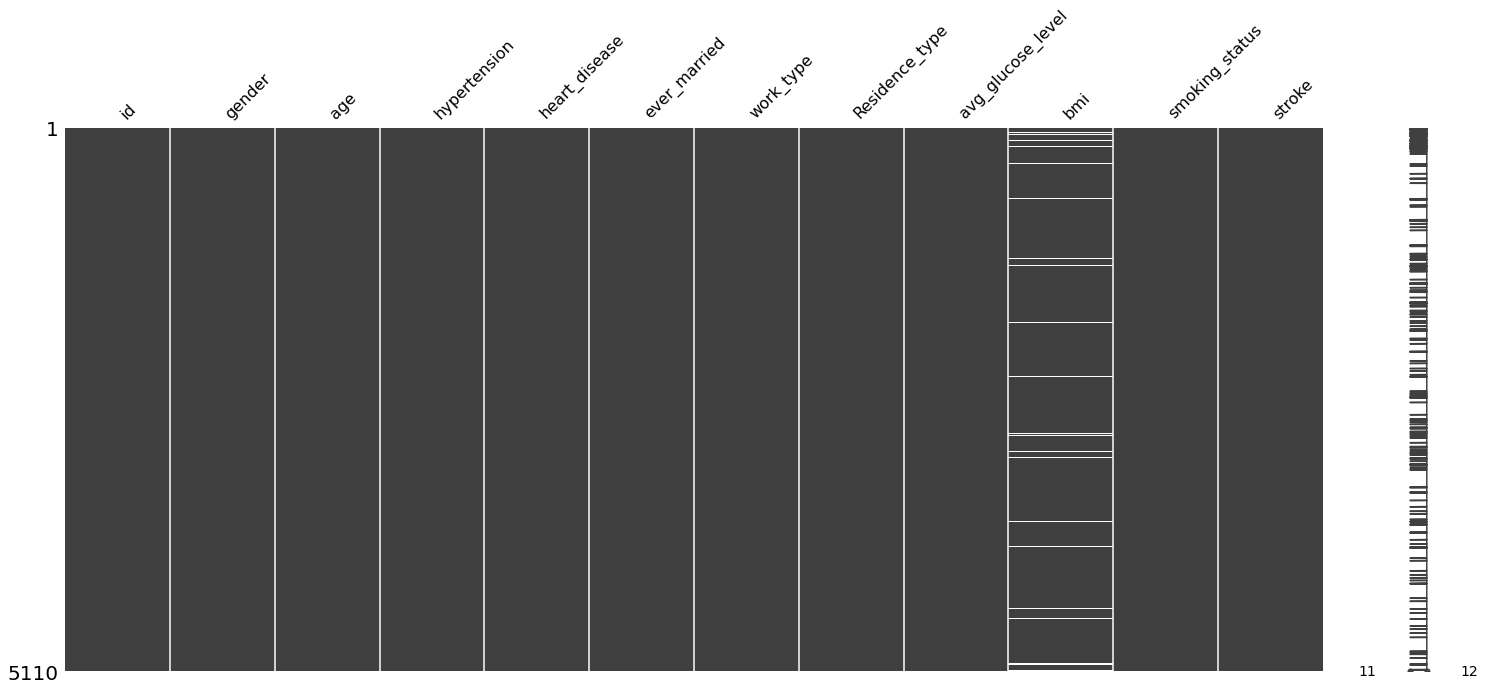

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [5]:
if dataset.isnull().any(axis=None):
    print("\nPreview of data with null values:")
    missingno.matrix(dataset)
    plot.show()
dataset.isna().sum().to_frame()

In [6]:
if len(dataset[dataset.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(dataset[dataset.duplicated()]))
    print(dataset[dataset.duplicated(keep=False)].sort_values(by=list(dataset.columns)).head())
else:
    print("No duplicated entries found in the dataset!")

No duplicated entries found in the dataset!


Removal of values with N/A

In [7]:
dataset.dropna(axis=0,inplace=True)
dataset.shape


(4909, 12)

In [8]:
dataset["ever_married"].replace({"No":0, "Yes":1}, inplace = True)

In [9]:
dataset.isna().sum().to_frame()
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
d1=dataset.groupby('stroke').count()['gender']
d1
label1=dataset.groupby('stroke').count()['age'].index
label1

Int64Index([0, 1], dtype='int64', name='stroke')

In [11]:
%matplotlib inline

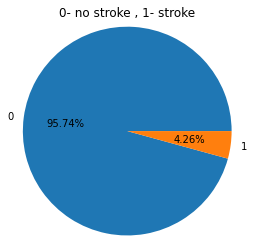

In [12]:
plot.pie(d1,labels=label1, autopct='%1.2f%%',radius=1.2)
plot.title("0- no stroke , 1- stroke")
plot.show()

In [18]:
strokePatients = dataset[dataset["stroke"]==1]
strokePatients2 = dataset[dataset["gender"]=='Other']
nonStroke = dataset[dataset["stroke"]==0]
print(strokePatients2)

         id gender   age  hypertension  heart_disease  ever_married work_type  \
3116  56156  Other  26.0             0              0             0   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  


<AxesSubplot:xlabel='age', ylabel='Count'>

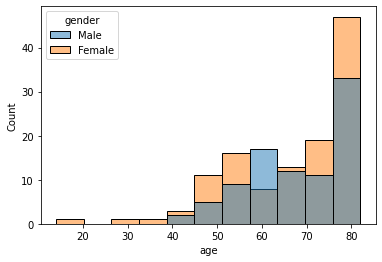

In [14]:
sns.histplot(data=strokePatients,x="age",hue="gender")

In [20]:
d2=strokePatients.groupby('hypertension').count()['age']
print(d2)
d3=nonStroke.groupby('hypertension').count()['age']
print(d3)
label2=strokePatients.groupby('hypertension').count()['age'].index
label2

hypertension
0    149
1     60
Name: age, dtype: int64
hypertension
0    4309
1     391
Name: age, dtype: int64


Int64Index([0, 1], dtype='int64', name='hypertension')

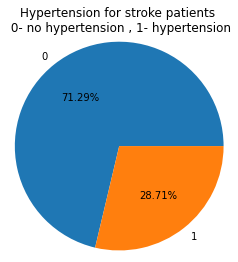

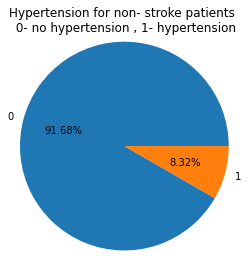

In [23]:
plot.pie(d2,labels=label2, autopct='%1.2f%%',radius=1.2)
plot.title("Hypertension for stroke patients \n 0- no hypertension , 1- hypertension")
plot.show()
plot.pie(d3,labels=label2, autopct='%1.2f%%',radius=1.2)
plot.title("Hypertension for non- stroke patients \n 0- no hypertension , 1- hypertension")
plot.show()

In [24]:
d4=strokePatients.groupby('heart_disease').count()['age']
print(d4)
d5=nonStroke.groupby('heart_disease').count()['age']
print(d5)
label3=strokePatients.groupby('heart_disease').count()['age'].index
label3

heart_disease
0    169
1     40
Name: age, dtype: int64
heart_disease
0    4497
1     203
Name: age, dtype: int64


Int64Index([0, 1], dtype='int64', name='heart_disease')

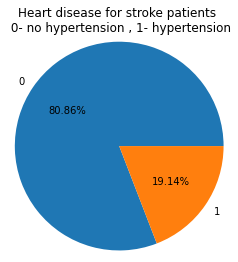

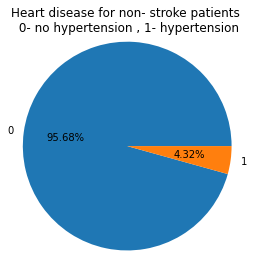

In [26]:
plot.pie(d4,labels=label2, autopct='%1.2f%%',radius=1.2)
plot.title("Heart disease for stroke patients \n 0- no heart disease , 1- has heart disease")
plot.show()
plot.pie(d5,labels=label2, autopct='%1.2f%%',radius=1.2)
plot.title("Heart disease for non- stroke patients \n 0- no heart disease , 1- has heart disease")
plot.show()

In [28]:
d6=strokePatients.groupby('ever_married').count()['age']
print(d6)
d7=nonStroke.groupby('ever_married').count()['age']
print(d7)
label4=strokePatients.groupby('ever_married').count()['age'].index
label4

ever_married
0     23
1    186
Name: age, dtype: int64
ever_married
0    1682
1    3018
Name: age, dtype: int64


Int64Index([0, 1], dtype='int64', name='ever_married')

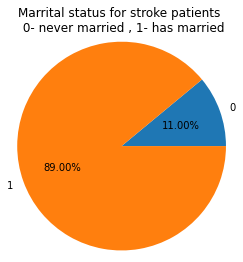

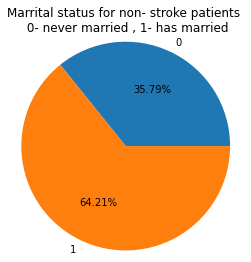

In [30]:
plot.pie(d6,labels=label4, autopct='%1.2f%%',radius=1.2)
plot.title("Marrital status for stroke patients \n 0- never married , 1- has married")
plot.show()
plot.pie(d7,labels=label4, autopct='%1.2f%%',radius=1.2)
plot.title("Marrital status for non- stroke patients \n 0- never married , 1- has married")
plot.show()

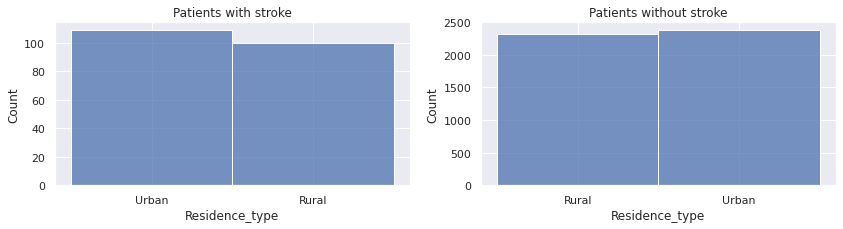

In [34]:
fig, ((ax1, ax2)) = plot.subplots(1,2,figsize=(14,3))
sns.histplot(data=strokePatients,x="Residence_type",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=nonStroke,x="Residence_type",ax=ax2)
ax2.title.set_text('Patients without stroke')

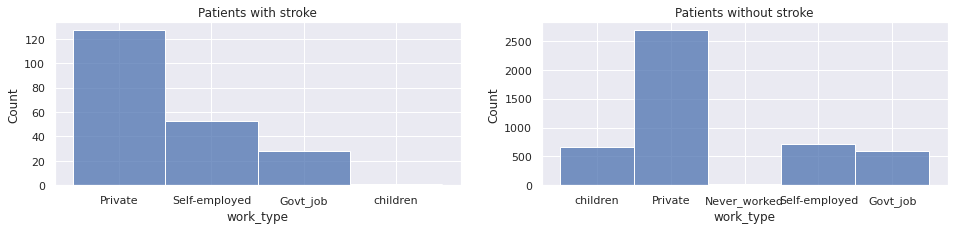

In [35]:
fig, ((ax1, ax2)) = plot.subplots(1,2,figsize=(16,3))
sns.histplot(data=strokePatients,x="work_type",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=nonStroke,x="work_type",ax=ax2)
ax2.title.set_text('Patients without stroke')

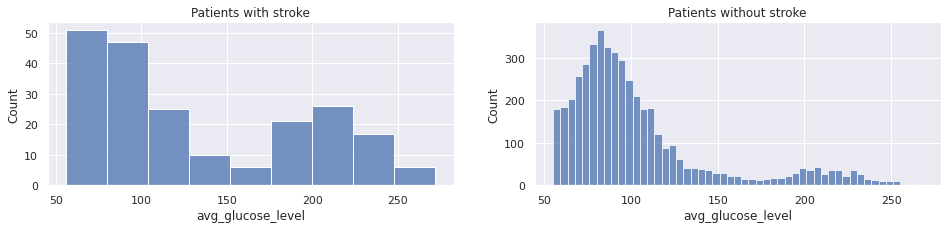

In [36]:
fig, ((ax1, ax2)) = plot.subplots(1,2,figsize=(16,3))
sns.histplot(data=strokePatients,x="avg_glucose_level",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=nonStroke,x="avg_glucose_level",ax=ax2)
ax2.title.set_text('Patients without stroke')

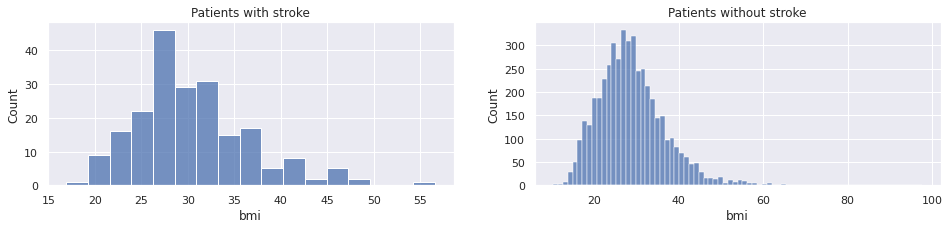

In [37]:
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plot.subplots(1,2,figsize=(16,3))
sns.histplot(data=strokePatients,x="bmi",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=nonStroke,x="bmi",ax=ax2)
ax2.title.set_text('Patients without stroke')

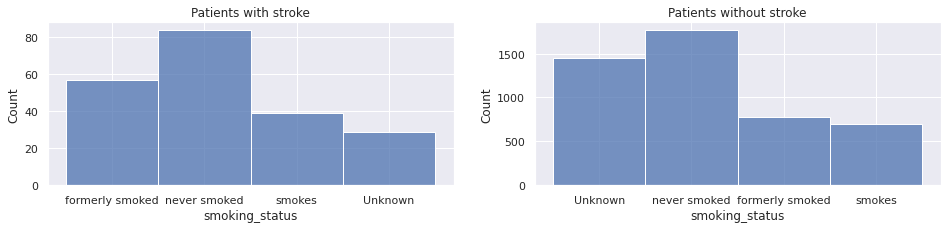

In [39]:
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plot.subplots(1,2,figsize=(16,3))
sns.histplot(data=strokePatients,x="smoking_status",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=nonStroke,x="smoking_status",ax=ax2)
ax2.title.set_text('Patients without stroke')